<a href="https://colab.research.google.com/github/Matheushp5/Exploratory-Data-nalysis/blob/main/telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Machine Learning Project - Study </h1>

The objective of this notebook is purely academic.

The opensource data set available can be found at the below URL.

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import requests
import zipfile
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# downloading the file

URL = 'https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip'

file_download = requests.get(URL)

file_name = 'magic.zip'
with open(file_name, 'wb') as file:
    file.write(file_download.content)

In [ ]:
#extracting the file

extract = 'extracted_contents'

with zipfile.ZipFile('magic.zip', 'r') as zip_ref:
    zip_ref.extractall(extract)

<p>Disclaimer</p>
<p>The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).</p>
<p><a src='http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68'>Click here</a></p>

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

<h2> EDA </h2>

In this particular scenario, we'll just explore the data without doing and transformation to it. This is for academic porpuse only.

In [ ]:
df = pd.read_csv('magic04.data')
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


As we can see, the labels are numerical, but, before we address that, let's check somw information about it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   28.7967  19019 non-null  float64
 1   16.0021  19019 non-null  float64
 2   2.6449   19019 non-null  float64
 3   0.3918   19019 non-null  float64
 4   0.1982   19019 non-null  float64
 5   27.7004  19019 non-null  float64
 6   22.011   19019 non-null  float64
 7   -8.2027  19019 non-null  float64
 8   40.092   19019 non-null  float64
 9   81.8828  19019 non-null  float64
 10  g        19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Now let's change the labels to the correct values

In [ ]:
# creating a list with the labels
cols = ["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", " fAlpha", "fDist", "class"]

# now, sending them to the df
df.columns = cols
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


If we look into the 'class' column, we'll see that it has letters (object) stored.

To see the values, we can use the .unique() function.

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Let's change them into numbers by doing some feature emcoding with the nominal values.

Here, I'll simply use .get_dummies to transform the values into 0 and 1 by doing some hot-enconding.

In [ ]:
df1 = df.copy() # make a copy to save our work

df_encoded = pd.get_dummies(df, columns=["class"])
df_encoded.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_g,class_h
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1,0
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,1,0
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,1,0
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,1,0
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1,0


However, for this data analysis (EDA) and modeling, we'll have another approach, which is simply substitution the leters by the numbers 0 and 1.

It is just a second approach with the same result.

In [ ]:
df1["class"] = (df["class"] == "g").astype(int) # it converts the assigned columnto int

If we look the original df now, we'll see that 'g' (gamas) have been converted to 0 (as it is true in the code above) and the rest (in this case, 'h') will be 1.

In [ ]:
df1.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1


One of the most inportant thinsg when working with data is to have no skwed data (Normal Distribuition). First, we can check the .describe() function.

This will help us identify big gaps.

In [ ]:
df_encoded = df1.copy()

describe_df = df_encoded.describe()
describe_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912,0.648352
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344,0.477497
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000,0.000000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900,1.000000
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


Another valuable thing we can do in EDA is checking for skewness of the data.

In [ ]:
df_encoded.skew().sort_values(ascending=True)

fM3Long    -1.123018
fAsym      -1.046361
class      -0.621437
fM3Trans    0.120059
fDist       0.229562
fConc       0.485886
fConc1      0.685654
 fAlpha     0.850952
fSize       0.875437
fLength     2.013571
fWidth      3.371518
dtype: float64

We'll consider a skwed data the ones above 0.6 and -0.6.

In this scenario, we have the columns fM3long, fAsym, fConc1, fAlpha, fSize, fLength, and fWidth with negative and positive skewness.

Now, we can check their bellcurve:

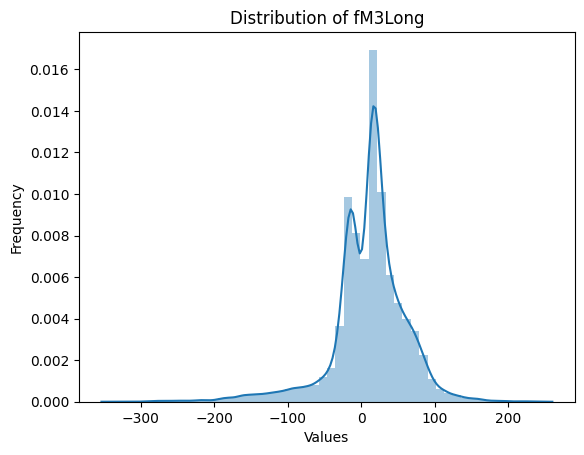

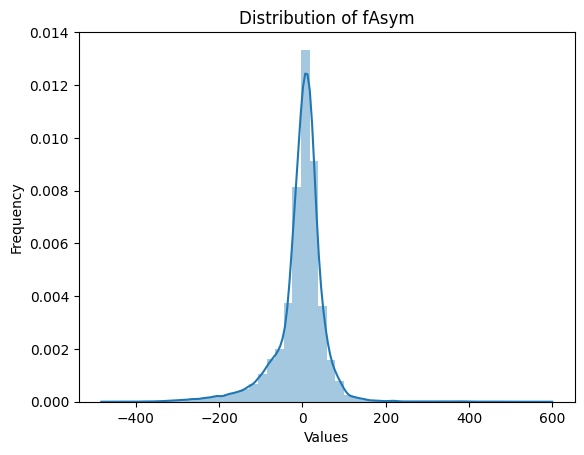

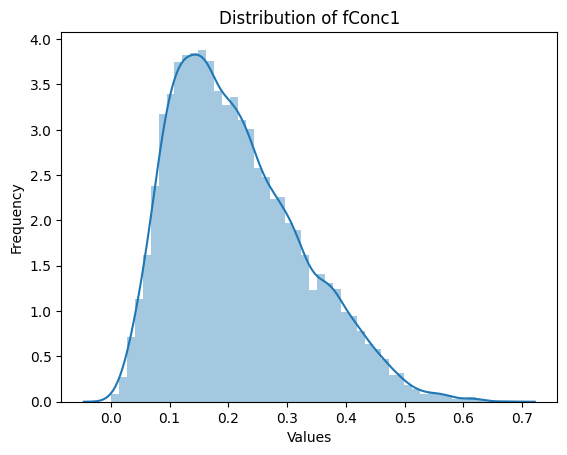

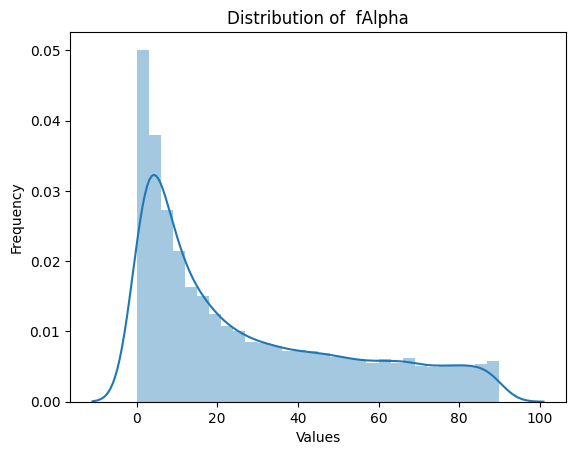

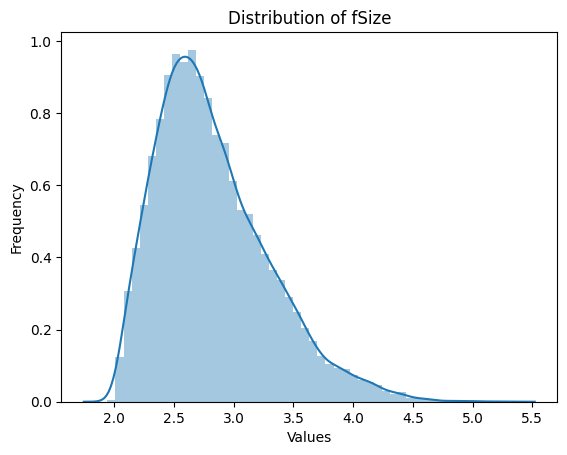

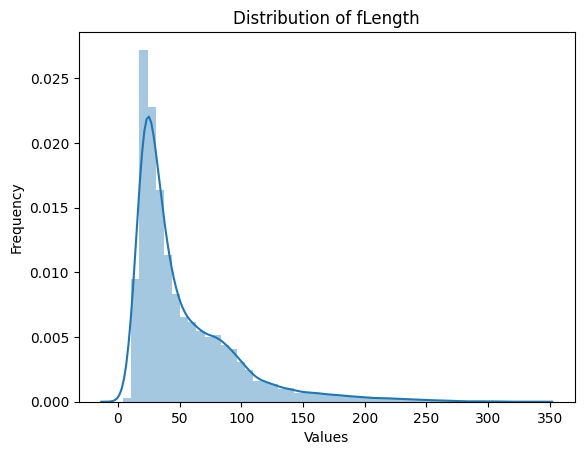

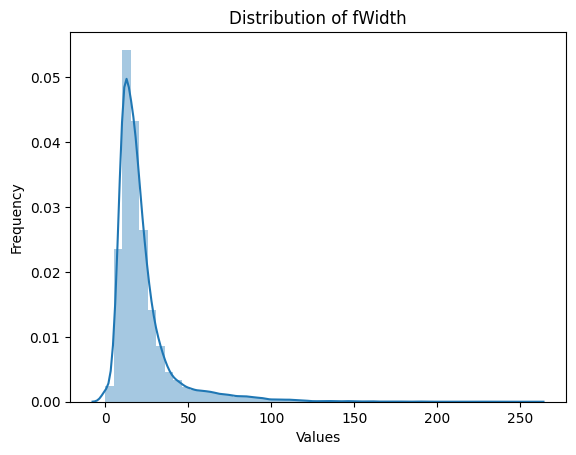

In [ ]:
df_encoded1 = df_encoded.copy() # making a copy so we save the previous data

cols_distplot = ['fM3Long', 'fAsym','fConc1', ' fAlpha', 'fSize', 'fLength', 'fWidth']

for column in cols_distplot:
  sns.distplot(df_encoded1[column])
  plt.title(f'Distribution of {column}')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

We can pairplot the values to check for outliers. However, given the nature of the data, we won't be dealing with them now.

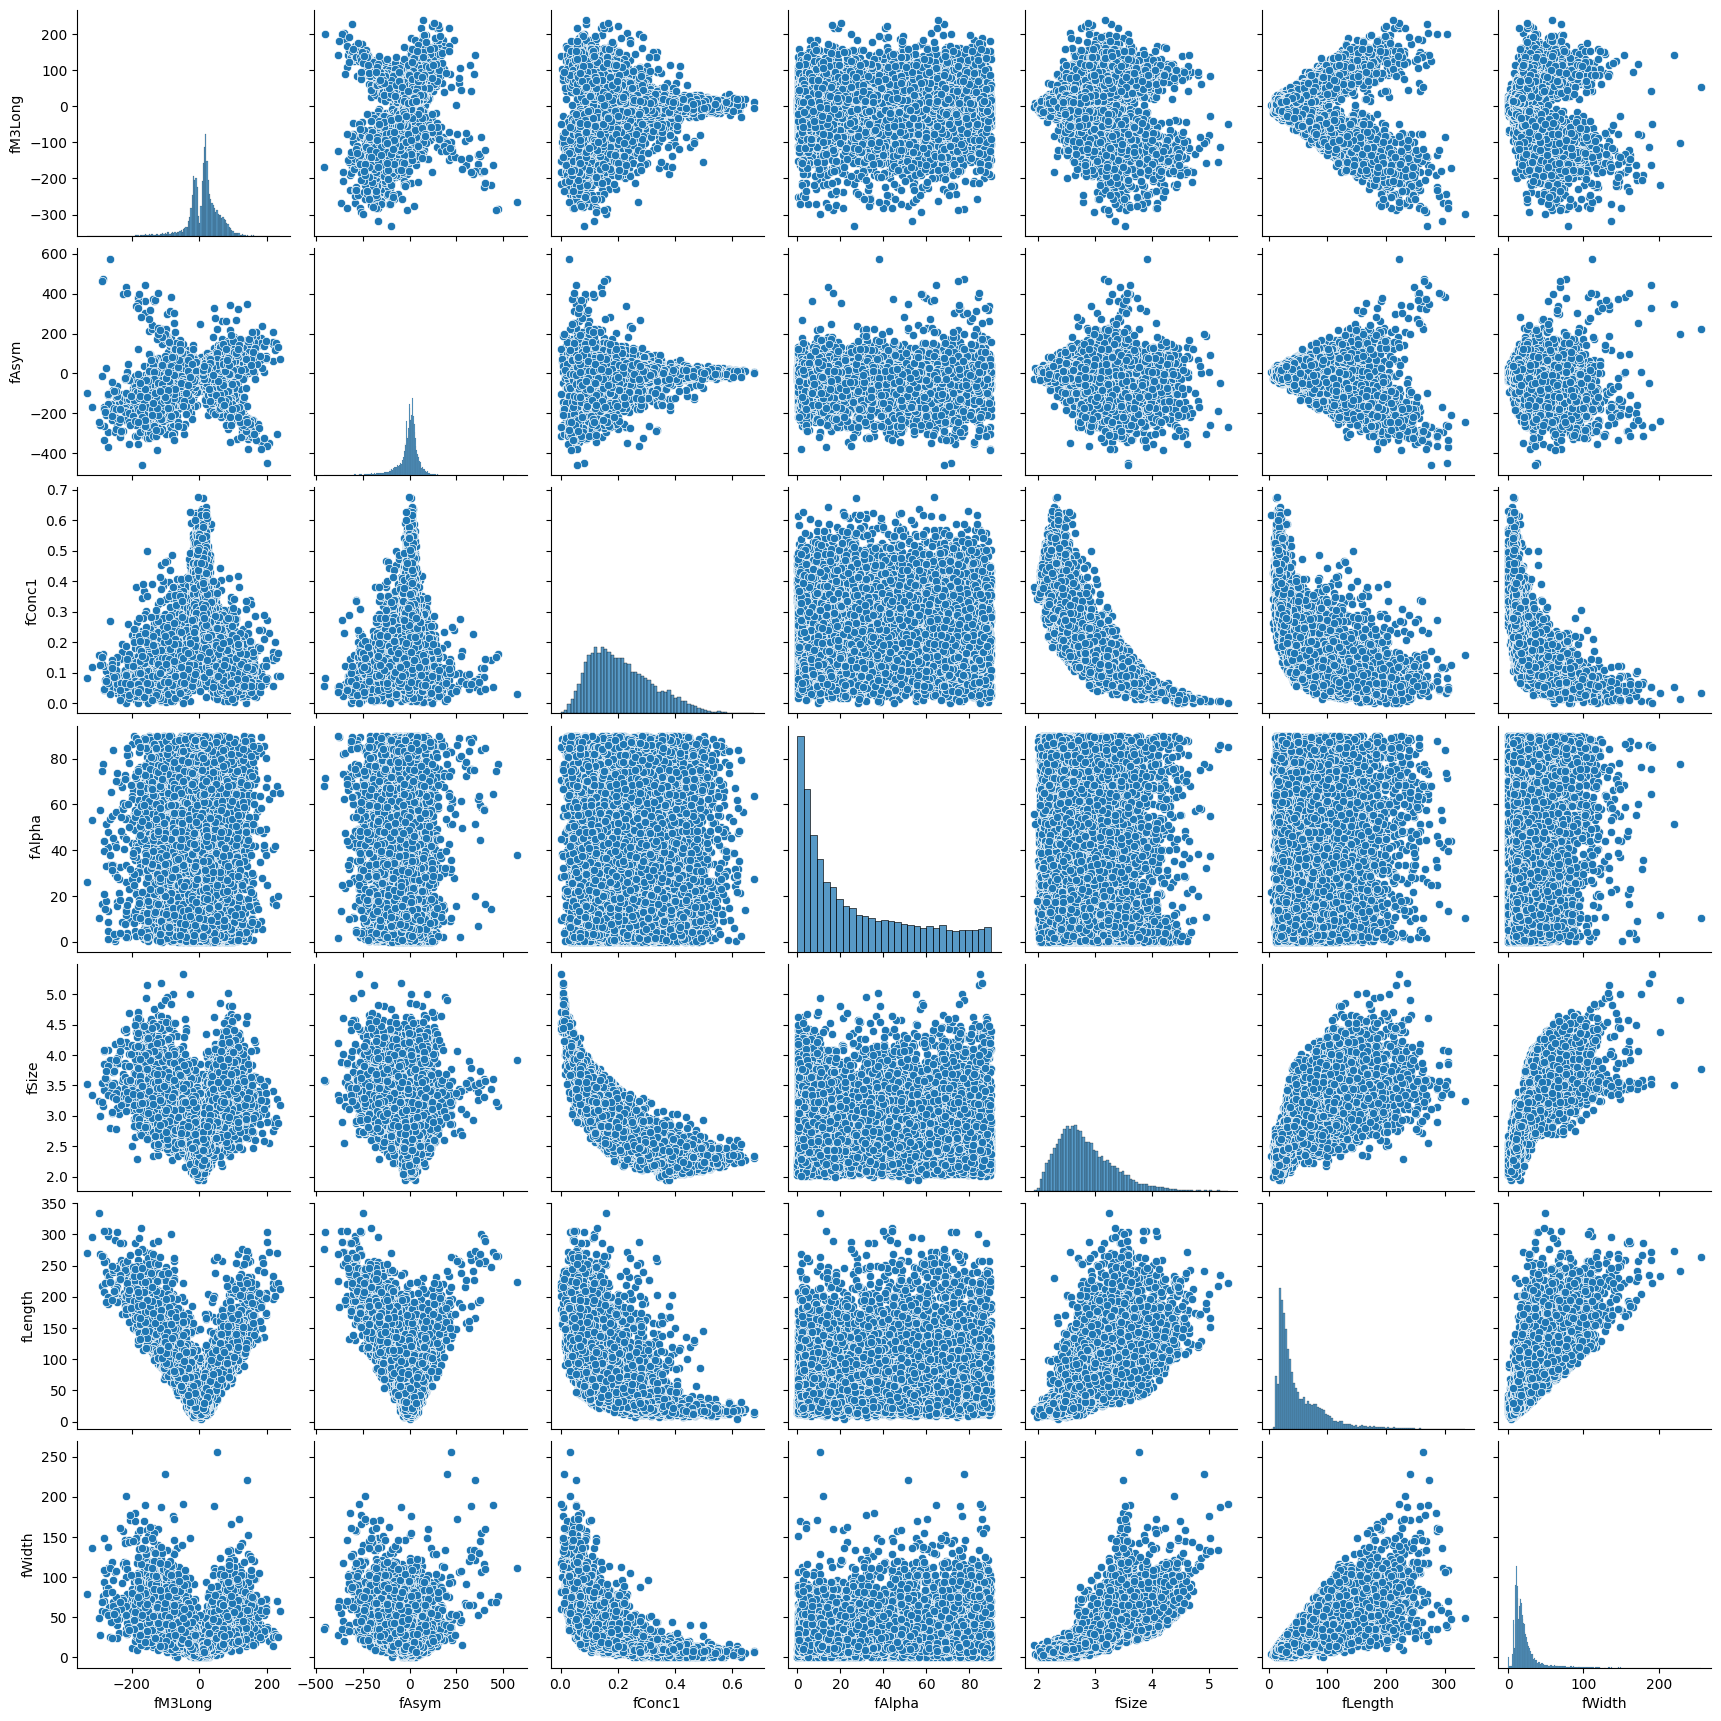

In [ ]:
sns.pairplot(df_encoded1[['fM3Long', 'fAsym', 'fConc1', ' fAlpha', 'fSize', 'fLength', 'fWidth']])
plt.show()

Finally, we can check the data in a histogram format for analysis.

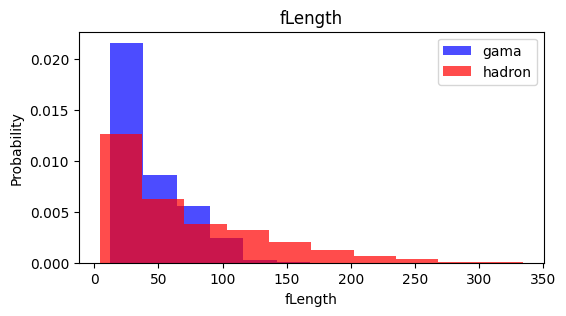

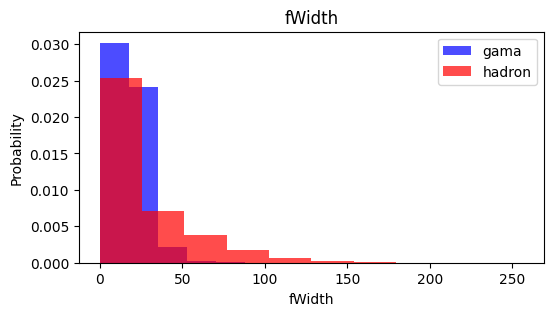

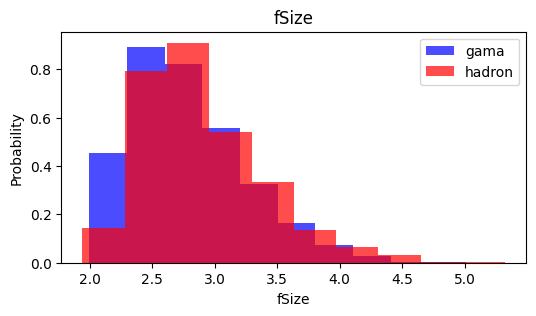

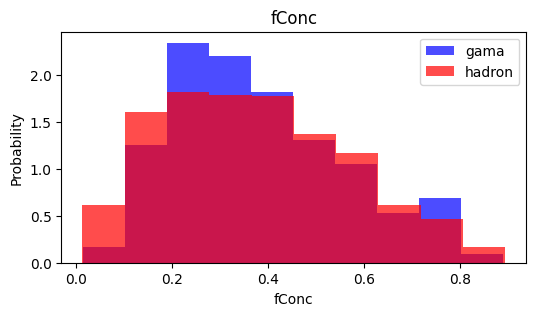

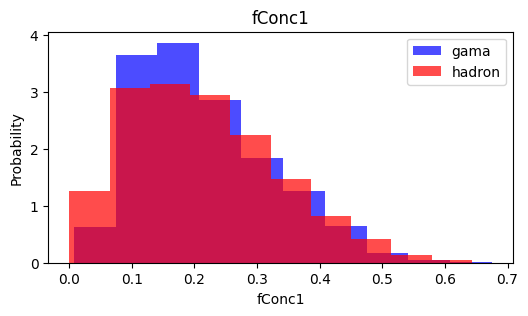

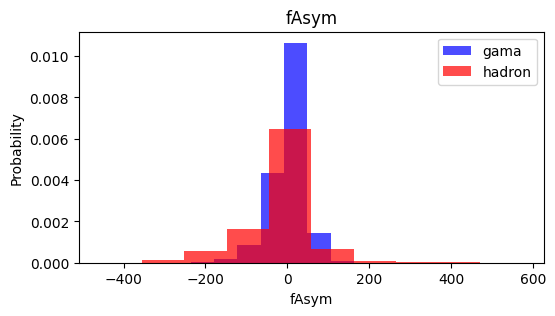

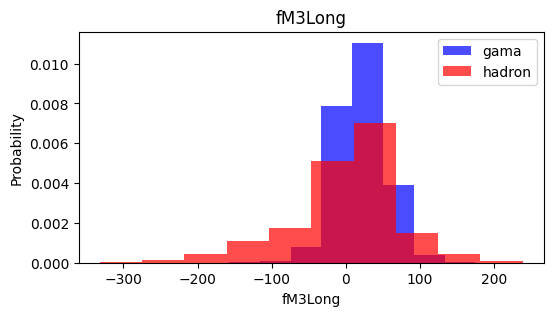

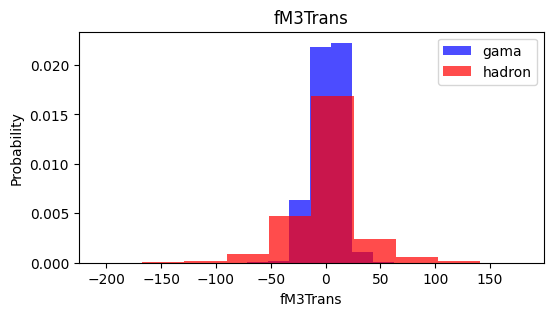

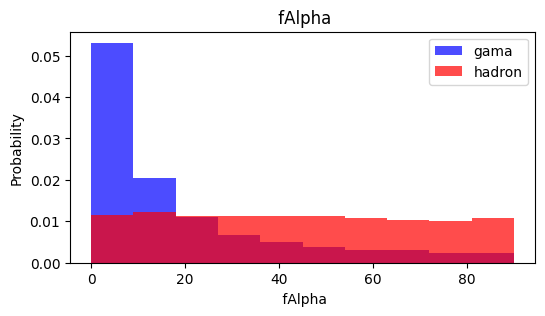

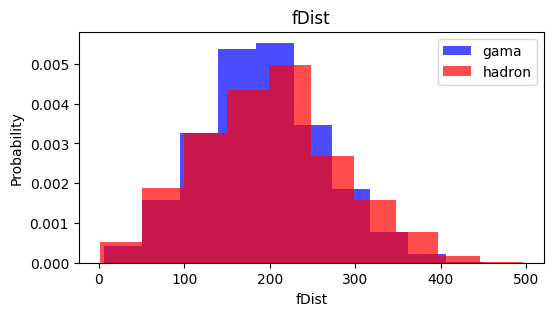

In [ ]:
for label in cols[:-1]:
  plt.figure(figsize=(6, 3))
  plt.hist(df_encoded[df_encoded['class_g']==1][label], color='blue', label='gama', alpha=0.7, density=True)
  plt.hist(df_encoded[df_encoded['class_h']==1][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In this data, we can see in a sample that some features are in the 100's (100.00) house and another in the decimals' (0.1).

It is importante to have it evenly distributed (normal distribution) so we achieve a standard deviation.

For that to be true, we'll create a function as it follows:

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # check all the values up to the last one
  y = dataframe[dataframe.columns[-1]].values # indexes in the last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

<h2> Train, validadation and test datasets

We'll set the training at 60% of the df, the validation at 20% and the final test df at 10%.

In [ ]:
train, val, test = np.split(df1.sample(frac=1), [int(0.6 * len(df1)), int(0.8 * len(df1)), ])

Let's have a look in the length of the training dataset, particularly at the 2 target columns:

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7410
4001


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
val, X_val, y_val = scale_dataset(val, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
# proper format the data
train, X_train, y_train = scale_dataset(train)
val, X_val, y_val = scale_dataset(val)
test, X_test, y_test = scale_dataset(test)

<h2>KNN</h2>

We're going to perform KNN do determine our targets.

Here's a simple explanation about it:

K-nearest neighbors (KNN) is a simple yet effective machine learning algorithm used for both classification and regression tasks.

It operates based on the principle that similar data points are likely to belong to the same class or have similar properties. In classification, when presented with a new input, KNN identifies its k-nearest neighbors (data points with the most similar features) from the training set based on a chosen distance metric (such as Euclidean distance) and assigns the majority class among these neighbors to the new input.

In regression, KNN predicts the output by averaging or considering the values of the k-nearest neighbors. KNN's performance heavily depends on the choice of k (the number of neighbors) and the distance metric used, making it sensitive to noisy data and computationally expensive for large datasets during prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # our model will classify
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1361
           1       0.84      0.85      0.85      2443

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



Now our model is trained, validated and we tested it. Above, we cans ee the prediction results and the precision on finding weather the sample is g (1) or h (0) based on the given features.